In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from google.colab import drive
url = "https://drive.google.com/file/d/1xG-ruT7PqEXD10Hksqn9EJfWvoHTuodB/view?usp=sharing"
loc = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
energy_price_data = pd.read_pickle(loc).drop_duplicates().reset_index(drop=True)
energy_price_data = energy_price_data[energy_price_data['Date'] >= '2020-01-01']
energy_price_data

,Date,Forecasted Load (MISO),Day Ahead Energy Price (IL),Energy Price (IL),Sin_Month,Cos_Month,Sin_Day,Cos_Day,Sin_Hour,Cos_Hour,Energy Price (MICHIGAN.HUB),Energy Price (MINN.HUB),Energy Price (INDIANA.HUB),Energy Price (TEXAS.HUB),Energy Price (LOUISIANA.HUB),Energy Price (ARKANSAS.HUB),Energy Price (MS.HUB),Temperature
11169,2020-01-01 01:00:00,0.248875,0.084729,0.041956,0.75,0.933013,1.0,0.25,0.635214,0.981372,0.020650,0.041148,0.011824,0.028077,0.055516,0.028281,0.035388,0.412651
11170,2020-01-01 02:00:00,0.227755,0.082722,0.042409,0.75,0.933013,1.0,0.25,0.760399,0.926869,0.020936,0.040769,0.012101,0.028160,0.055603,0.028365,0.035473,0.403614
11171,2020-01-01 03:00:00,0.216184,0.086044,0.041091,0.75,0.933013,1.0,0.25,0.866272,0.840534,0.019897,0.040340,0.011134,0.027920,0.055364,0.028124,0.035230,0.394578
11172,2020-01-01 04:00:00,0.209648,0.083391,0.040044,0.75,0.933013,1.0,0.25,0.944980,0.728769,0.019186,0.039896,0.010515,0.027834,0.055250,0.028012,0.035108,0.387048
11173,2020-01-01 05:00:00,0.209844,0.082561,0.041229,0.75,0.933013,1.0,0.25,0.990686,0.599865,0.019983,0.040302,0.011233,0.028107,0.055538,0.028306,0.035407,0.382530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32637,2023-09-30 18:00:00,0.493497,0.148466,0.047180,0.00,0.500000,0.0,0.75,0.009314,0.599865,0.025952,0.053008,0.017139,0.032007,0.059056,0.031786,0.038839,0.837349
32638,2023-09-30 19:00:00,0.471059,0.135363,0.046723,0.00,0.500000,0.0,0.75,0.055020,0.728769,0.025401,0.052167,0.016586,0.031409,0.058586,0.031213,0.038407,0.813253
32639,2023-09-30 20:00:00,0.434116,0.121707,0.046252,0.00,0.500000,0.0,0.75,0.133728,0.840534,0.024072,0.046577,0.015297,0.030307,0.057572,0.030102,0.037360,0.793675
32640,2023-09-30 21:00:00,0.398046,0.109319,0.047428,0.00,0.500000,0.0,0.75,0.239601,0.926869,0.023574,0.042477,0.014818,0.029737,0.057029,0.029575,0.036797,0.778614


In this notebook, we will predict the actual energy price at Illinois hub using the dataset from Milestone 1.

We will use the following column in the dataset as feature:
1. `Sin_Month`, `Cos_Month`. Month in dyclical data format.
2. `Sin_Day`, `Cos_Day`. Day of the week in dyclical data format.
3. `Sin_Hour`, `Cos_Hour`. Hour of the day in dyclical data format.
4. `Temperature`. Air temperature at Illinois.
5. `Forecasted Load (MISO)`. Forecasted Load from MISO.
6. `Day Ahead Energy Price (IL)`. Day Ahead Energy Price at Illinois.
7. `Energy Price (MICHIGAN.HUB)`. Energy Price at Michigan hub.
8. `Energy Price (INDIANA.HUB)`. Energy Price at Indiana hub.
9. `Energy Price (LOUISIANA.HUB)`. Energy Price at Louisiana hub.
10. `Energy Price (ARKANSAS.HUB)`. Energy Price at Arkansas hub.

We will use the following column in the dataset as label:
1. `Energy Price (IL)`. Energy price at Illinois hub.

In [2]:
il_hub_data = energy_price_data[[
    'Date',
    'Sin_Month', 'Cos_Month', 'Sin_Day', 'Cos_Day','Sin_Hour', 'Cos_Hour',
    'Temperature',
    'Forecasted Load (MISO)',
    'Day Ahead Energy Price (IL)',
    'Energy Price (MICHIGAN.HUB)',
    'Energy Price (INDIANA.HUB)',
    'Energy Price (LOUISIANA.HUB)',
    'Energy Price (ARKANSAS.HUB)',
    'Energy Price (IL)'
    ]].drop_duplicates().reset_index(drop=True)

il_hub_data

,Date,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Sin_Hour,Cos_Hour,Temperature,Forecasted Load (MISO),Day Ahead Energy Price (IL),Energy Price (MICHIGAN.HUB),Energy Price (INDIANA.HUB),Energy Price (LOUISIANA.HUB),Energy Price (ARKANSAS.HUB),Energy Price (IL)
0,2020-01-01 01:00:00,0.75,0.933013,1.0,0.25,0.635214,0.981372,0.412651,0.248875,0.084729,0.020650,0.011824,0.055516,0.028281,0.041956
1,2020-01-01 02:00:00,0.75,0.933013,1.0,0.25,0.760399,0.926869,0.403614,0.227755,0.082722,0.020936,0.012101,0.055603,0.028365,0.042409
2,2020-01-01 03:00:00,0.75,0.933013,1.0,0.25,0.866272,0.840534,0.394578,0.216184,0.086044,0.019897,0.011134,0.055364,0.028124,0.041091
3,2020-01-01 04:00:00,0.75,0.933013,1.0,0.25,0.944980,0.728769,0.387048,0.209648,0.083391,0.019186,0.010515,0.055250,0.028012,0.040044
4,2020-01-01 05:00:00,0.75,0.933013,1.0,0.25,0.990686,0.599865,0.382530,0.209844,0.082561,0.019983,0.011233,0.055538,0.028306,0.041229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21468,2023-09-30 18:00:00,0.00,0.500000,0.0,0.75,0.009314,0.599865,0.837349,0.493497,0.148466,0.025952,0.017139,0.059056,0.031786,0.047180
21469,2023-09-30 19:00:00,0.00,0.500000,0.0,0.75,0.055020,0.728769,0.813253,0.471059,0.135363,0.025401,0.016586,0.058586,0.031213,0.046723
21470,2023-09-30 20:00:00,0.00,0.500000,0.0,0.75,0.133728,0.840534,0.793675,0.434116,0.121707,0.024072,0.015297,0.057572,0.030102,0.046252
21471,2023-09-30 21:00:00,0.00,0.500000,0.0,0.75,0.239601,0.926869,0.778614,0.398046,0.109319,0.023574,0.014818,0.057029,0.029575,0.047428


We use the data from 2020-2023 as training data and the data from 2023-2024 as testing data.

In [3]:
train_data = il_hub_data[il_hub_data['Date'] < '2023-01-01'].drop(columns=['Date']).to_numpy()
test_data  = il_hub_data[il_hub_data['Date'] >= '2023-01-01'].drop(columns=['Date']).to_numpy()

X_train = train_data[:,:-1]
y_train = train_data[:,-1]
X_test = test_data[:,:-1]
y_test = test_data[:,-1]

print(f"Shapes of the sets:\nfeature_train: {X_train.shape}, feature_test: {X_test.shape}")
print(f"label_train: {y_train.shape}, label_test: {y_test.shape}")

Shapes of the sets:
feature_train: (15712, 13), feature_test: (5761, 13)
label_train: (15712,), label_test: (5761,)


Next, we will run a simple linear regression model for the dataset above. This will be our baseline model to compare performance.

In [4]:
# Run linear regression

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model (example: using Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# You can also access other metrics like R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")


Mean Squared Error: 1.4419590231921264e-05
R-squared: 0.8545468599256885


We plot the predicted energy price for 2023-2024.



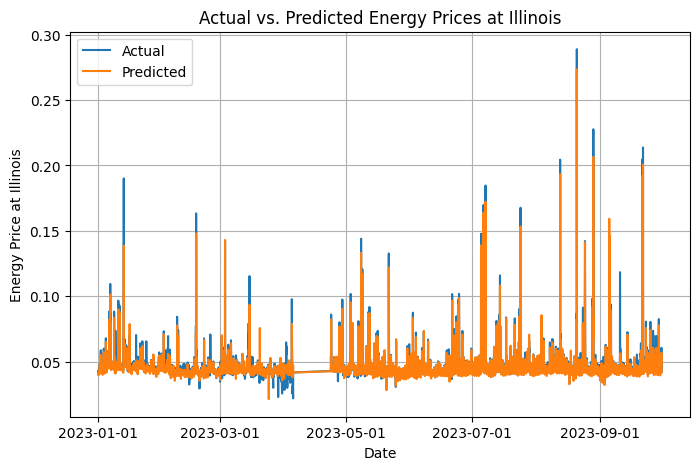

In [11]:
import matplotlib.pyplot as plt

y_date = il_hub_data[['Date']]
y_date = y_date[y_date['Date'] >= '2023-01-01']

plt.figure(figsize=(8, 5))
ax = plt.axes()
plt.plot(y_date['Date'], y_test, label='Actual')
plt.plot(y_date, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Price at Illinois')
plt.title('Actual vs. Predicted Energy Prices at Illinois')
ax.set_xticks(['2023-01-01','2023-03-01','2023-05-01','2023-07-01','2023-09-01'])
plt.legend()
plt.grid(True)
plt.show()